In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO


In [2]:
df=pd.read_csv("../data/raw/TeleCom_Data.csv")
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
1,"56;""services"";""married"";""high.school"";""no"";""no..."
2,"45;""services"";""married"";""basic.9y"";""unknown"";""..."
3,"59;""admin."";""married"";""professional.course"";""n..."
4,"41;""blue-collar"";""married"";""unknown"";""unknown""..."


When we imported the data we found that data was not in correct format so we used string manipulation technique and got the df in right format

In [3]:
# Open the raw CSV file and read all lines, stripping whitespace from each line
with open("../data/raw/TeleCom_Data.csv", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f]

# Remove the outermost quotes from each line if present
cleaned_lines = [line[1:-1] if line.startswith('"') and line.endswith('"') else line for line in lines]

# Join the cleaned lines into a single string to mimic a CSV file in memory
from io import StringIO
data = "\n".join(cleaned_lines)

# Read the cleaned CSV data into a pandas DataFrame, using semicolon as separator and double quote as quote character
df = pd.read_csv(StringIO(data), sep=';', quotechar='"')

# Clean up column names by removing any remaining double quotes and extra whitespace
df.columns = [col.replace('""', '').replace('"', '').strip() for col in df.columns]

# Clean up string values in all object columns by removing double quotes and extra whitespace
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace('""', '', regex=False).str.replace('"', '', regex=False).str.strip()

# Display the first few rows of the cleaned DataFrame
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# General Exploration !

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [5]:
# Show descriptive statistics for numerical features only
df.describe(include=["number"])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000
mean,40.021710,258.280427,2.567800,962.516707,0.172705,0.081901,93.575508,-40.501999,3.621422,5167.053344
std,10.419593,259.299856,2.770225,186.809028,0.493719,1.571037,0.578762,4.627358,1.734385,72.230334
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


We can see we have 10 numerical features
- Age: The column appears to have values within a reasonable and expected range
- duration: the 75th percentile is 319 and max is 4918 indicating presence of outliers
- campaign: the 75th percentile is 3 and max is 56 indicating presence of outliers
- pdays: seems like it only has two values 0 or 999 and most of the values are 999, we will investigate more on it later
- previous: seems like it mosttly has 0 values , we will investigate more on it later
- we got some basic ideas, we will do more exploration ahead
- emp.var.rate: This feature represents the employment variation rate. The values range from negative to positive, indicating different economic conditions across the dataset.
- cons.price.idx: The consumer price index shows some variation, reflecting changes in the economic environment during the data collection period.
- cons.conf.idx: The consumer confidence index also varies, with both negative and less negative values, indicating shifts in consumer sentiment.
- euribor3m: The 3-month Euribor rate has a wide range, suggesting different interest rate environments over time.
- nr.employed: The number of employees is mostly concentrated at a few values, indicating periods of economic stability or change.

In [6]:
numerical_cols = df.select_dtypes(include='number').columns

There are 11 categorical features in the dataset.
- The job feature has 12 unique categories, with 'admin.' being the most common (10,422 out of 41,180 entries).
- The marital feature has 4 unique categories, with 'married' as the most frequent (24,921 out of 41,180 entries).
- The education feature has 8 unique categories, and 'university.degree' is the most common (12,166 entries).
- The default, housing, and loan features are mostly 'no' or 'yes', with 'no' being the most frequent for both default 
(32,581) and loan (33,943), while 'yes' is most frequent for housing (21,571).
- The contact feature has 2 categories, with 'cellular' being the most common (26,140 entries).
- The month feature has 10 unique values, with 'may' being the most frequent (13,765 entries).
- The day_of_week feature has 5 unique values, with 'thu' as the most common (8,622 entries).
- The poutcome feature has 3 unique values, with 'nonexistent' being the most frequent (35,559 entries).
- The target variable y has 2 categories, with 'no' being the majority class (36,542 entries).

In [7]:
categorical_cols = df.select_dtypes(include='object').columns

In [8]:
df.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null values

In [9]:
df.duplicated().sum()

np.int64(12)

We found that there are 12 duplicate values present so we will drop these values

In [10]:
print("Shape of DataFrame before dropping duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape of DataFrame after dropping duplicates:", df.shape)

Shape of DataFrame before dropping duplicates: (41180, 21)
Shape of DataFrame after dropping duplicates: (41168, 21)


# Now lets explore the Categorical features first

In [11]:
df[categorical_cols].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41168,41168,41168,41168,41168,41168,41168,41168,41168,41168,41168
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24914,12162,32570,21566,33931,26131,13763,8617,35547,36531


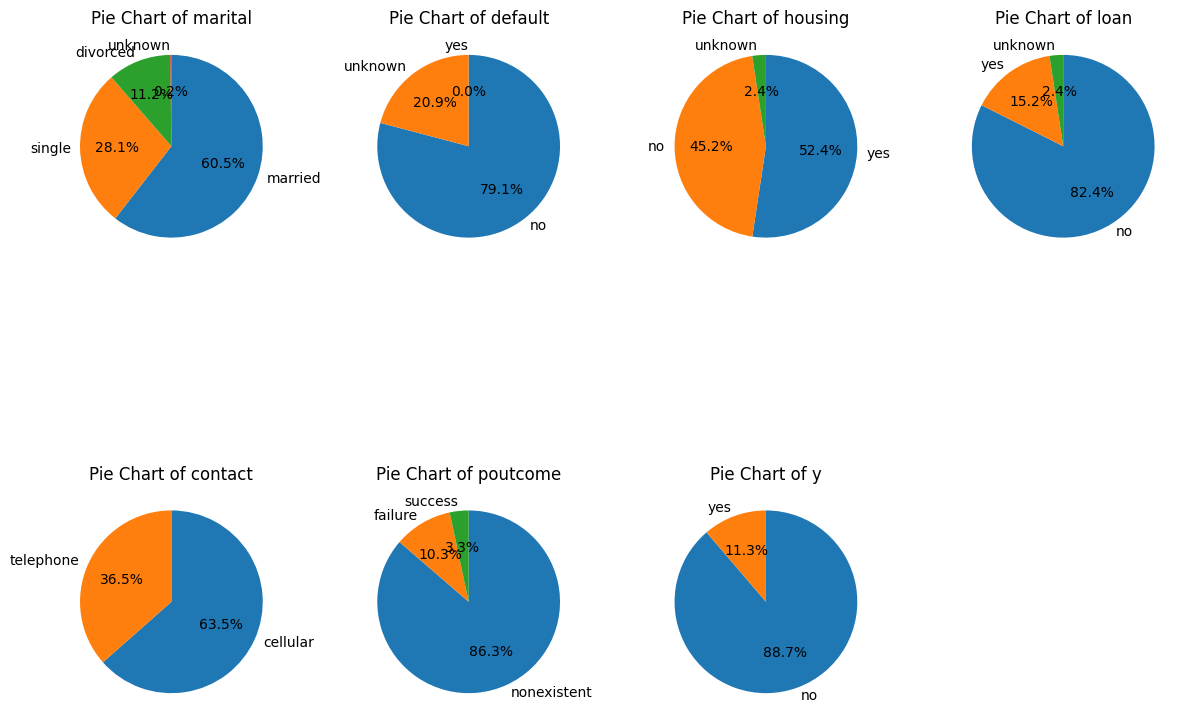

In [12]:
import math

# Select categorical columns with less than 5 unique values
cols_to_plot = [col for col in categorical_cols if df[col].nunique() < 5]
n = len(cols_to_plot)
ncols = 4
nrows = math.ceil(n / ncols)

plt.figure(figsize=(12, 5 * nrows))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(nrows, ncols, i)
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        legend=False
    )
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

- The marital column is dominated by 'married', followed by 'single', with 'divorced' and 'unknown' being much less frequent.
- For default, the vast majority of clients have 'no' credit in default, and very few have 'yes' or 'unknown'.
- The housing and loan columns show that most clients do not have a housing or personal loan, but a significant portion do have a housing loan.
- The contact method is mostly 'cellular', with 'telephone' being less common.
- The poutcome column is overwhelmingly 'nonexistent', indicating that most clients were not previously contacted in a prior campaign.
- The target variable y is highly imbalanced, with most clients not subscribing to the term deposit.

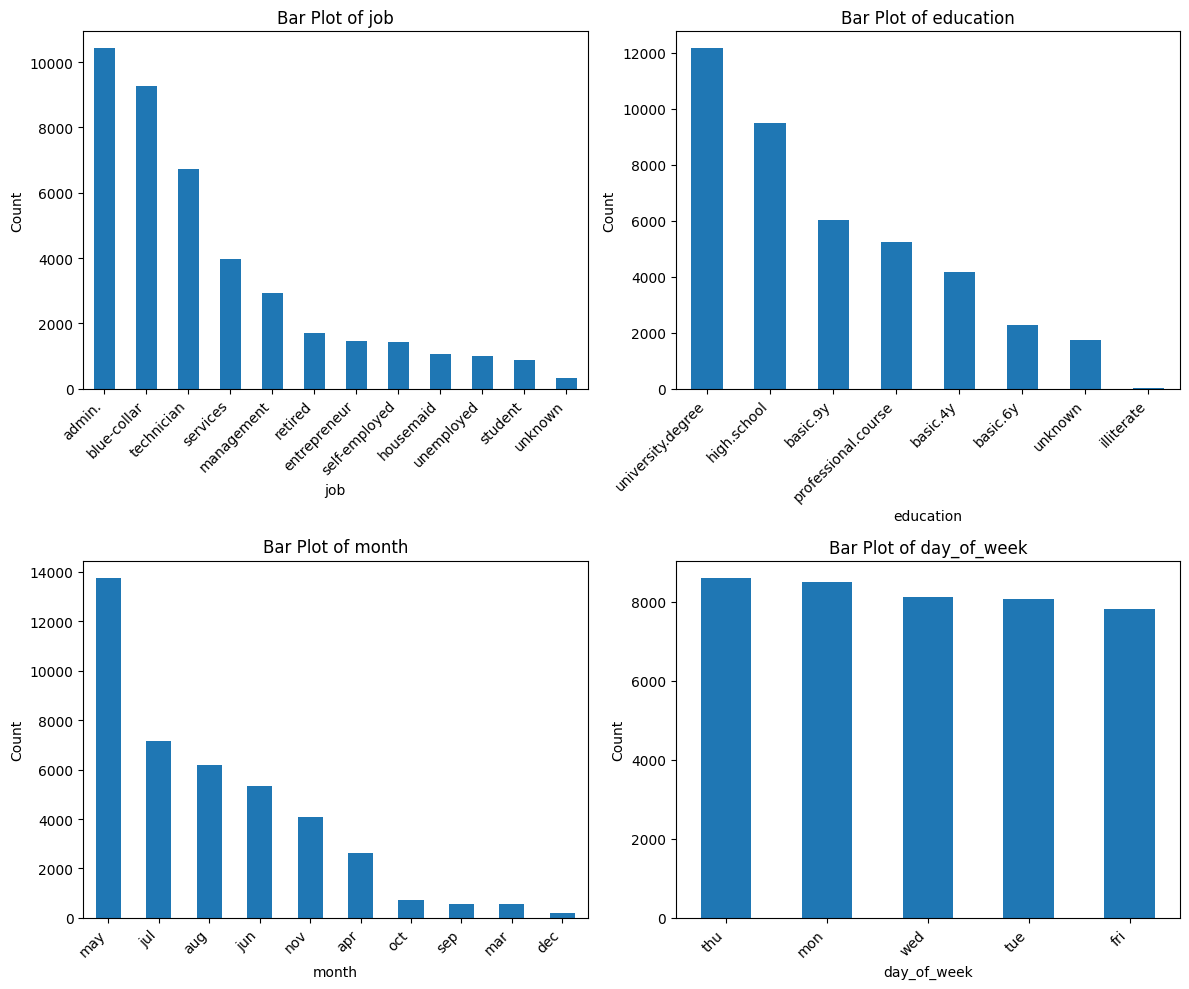

In [13]:


# Select categorical columns with more than 4 unique values
cols_to_plot = [col for col in categorical_cols if df[col].nunique() > 4]
n = len(cols_to_plot)
ncols = 2
nrows = (n + 1) // ncols

plt.figure(figsize=(12, 5 * nrows))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(nrows, ncols, i)
    df[col].value_counts().plot.bar()
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- The job feature is dominated by 'admin.', 'blue-collar', and 'technician', while categories like 'student' and 'unknown' are much less frequent.
- For education, most clients have a 'university.degree' or 'high.school' education, with very few being 'illiterate' or 'unknown'.
- The month feature shows a strong seasonality, with the majority of contacts occurring in May, followed by July and August, and very few in December and March. This suggests that marketing efforts were concentrated in specific months.
- The day_of_week feature is relatively balanced, but Thursday and Monday have slightly higher contact counts compared to other days, indicating a possible preference for contacting clients on these days.

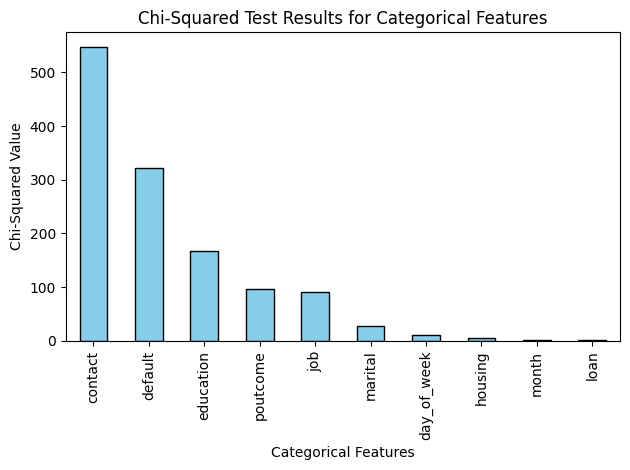

In [14]:
# Chi-Squared Test for Categorical Features vs Target (y)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Prepare a copy of the categorical columns and encode them numerically
temp = df[categorical_cols].copy()
temp.pop('y')
for col in temp.columns:
    le = LabelEncoder()
    temp[col] = le.fit_transform(temp[col])

# Encode the target variable y as binary
y = df['y'].map({'yes': 1, 'no': 0})

# Apply chi-squared test
chi_score = chi2(temp, y)
chi_values = pd.Series(chi_score[0], index=temp.columns, name='Chi-Squared Value').sort_values(ascending=False)

# Plot the chi-squared values
ax = chi_values.plot.bar(color='skyblue', edgecolor='k')
ax.set_xlabel('Categorical Features')
ax.set_ylabel('Chi-Squared Value')
ax.set_title('Chi-Squared Test Results for Categorical Features')
plt.tight_layout()
plt.show()

- Contact method has the highest chi-squared value by a large margin, indicating it is the most influential categorical feature for predicting the target. The way a client is contacted (cellular or telephone) is strongly associated with the likelihood of a positive response.
- Default status and education also show strong associations with the target, suggesting that whether a client has credit in default and their education level are important predictors.
- Poutcome (outcome of the previous marketing campaign) and job have moderate predictive power.
- Marital status, day_of_week, housing, month, and loan have much lower chi-squared values, indicating weaker or negligible association with the target.
- Features with very low chi-squared values (like month and loan) contribute little to distinguishing between the classes and may be less useful for modeling.

Now lets have a look at the "Unknown" value present in the categorical features

In [15]:
# Count the frequency of 'unknown' values in each categorical feature
unknown_counts = {}
for col in categorical_cols:
    count = (df[col] == 'unknown').sum()
    unknown_counts[col] = count
unknown_counts_df = pd.DataFrame(list(unknown_counts.items()), columns=['Feature', 'Unknown_Count'])
display(unknown_counts_df.sort_values(by='Unknown_Count', ascending=False))

,Feature,Unknown_Count
3,default,8595
2,education,1730
4,housing,990
5,loan,990
0,job,330
1,marital,80
6,contact,0
7,month,0
8,day_of_week,0
9,poutcome,0


In [16]:
# Print the percentage of 'unknown' values in each categorical feature
total_rows = len(df)
unknown_percent = unknown_counts_df.copy()
unknown_percent['Unknown_Percent'] = 100 * unknown_percent['Unknown_Count'] / total_rows
display(unknown_percent[['Feature', 'Unknown_Percent']].sort_values(by='Unknown_Percent', ascending=False))

,Feature,Unknown_Percent
3,default,20.877866
2,education,4.202293
4,housing,2.404780
5,loan,2.404780
0,job,0.801593
1,marital,0.194326
6,contact,0.000000
7,month,0.000000
8,day_of_week,0.000000
9,poutcome,0.000000


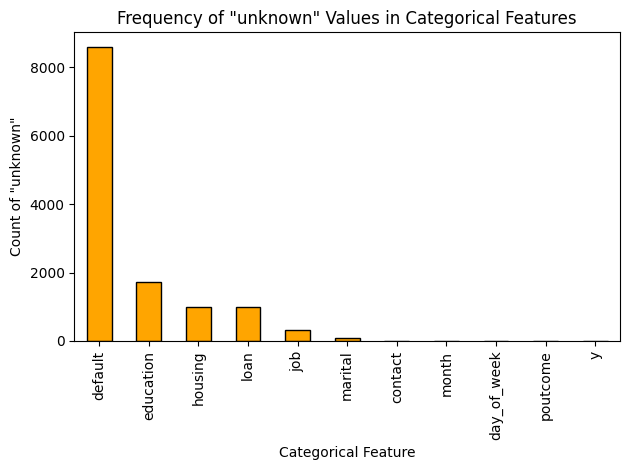

In [17]:
# Plot the frequency of 'unknown' values in each categorical feature
unknown_counts_sorted = unknown_counts_df.sort_values(by='Unknown_Count', ascending=False)
ax = unknown_counts_sorted.plot.bar(x='Feature', y='Unknown_Count', legend=False, color='orange', edgecolor='k')
ax.set_xlabel('Categorical Feature')
ax.set_ylabel('Count of "unknown"')
ax.set_title('Frequency of "unknown" Values in Categorical Features')
plt.tight_layout()
plt.show()

- The default feature has by far the highest number of "unknown" values, indicating a significant portion of clients did not disclose their default status. This could impact the reliability of this feature for modeling and may require special handling (e.g., imputation or separate category).
- Education, housing, and loan also have a notable number of "unknown" values, though much less than default. These features may also need to be treated carefully in analysis and modeling.
- Features like job and marital have a small number of "unknown" values, while contact, month, day_of_week, poutcome, and y have virtually none.

# Now lets have a look at Numerical columns as well

In [18]:
df[numerical_cols].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000
mean,40.021449,258.311237,2.568087,962.506073,0.172756,0.081937,93.575563,-40.502261,3.621425,5167.052308
std,10.419022,259.325938,2.770530,186.835214,0.493782,1.570960,0.578761,4.627020,1.734375,72.230165
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


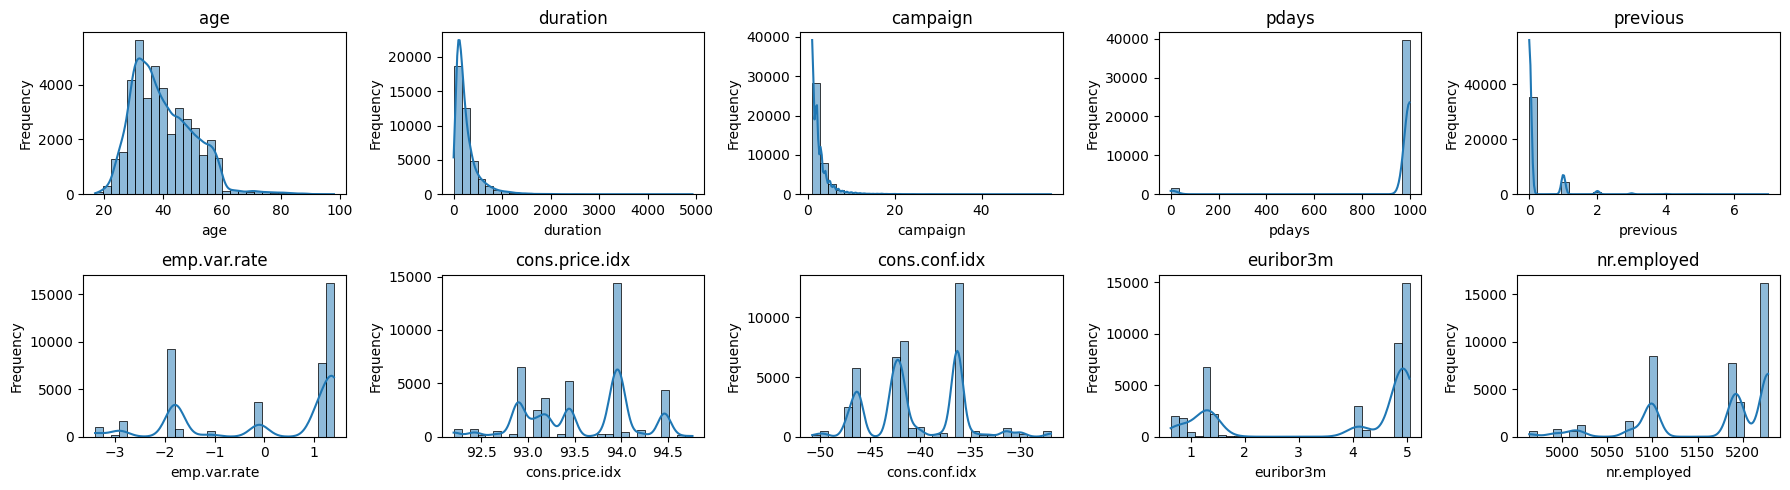

In [19]:
# 1. Histogram: Visualize the distribution of each numerical variable with histograms in a 2 x 5 grid
fig, axes = plt.subplots(2, 5, figsize=(18 ,5))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

for i, var in enumerate(numerical_cols):  # numerical_cols is already defined as df.select_dtypes(include='number').columns
    sns.histplot(df[var], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'{var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- The age distribution is right-skewed, with most clients between 30 and 60 years old.
duration, campaign, pdays, and previous are all highly right-skewed, with most values clustered at the lower end and a few large outliers.
- Economic indicators like emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed show multimodal or discrete distributions, reflecting changes in the economic environment over time.
- The pdays variable is almost always 999, indicating most clients were not previously contacted.
- The previous variable is mostly zero, meaning most clients had no prior contacts before the current campaign.

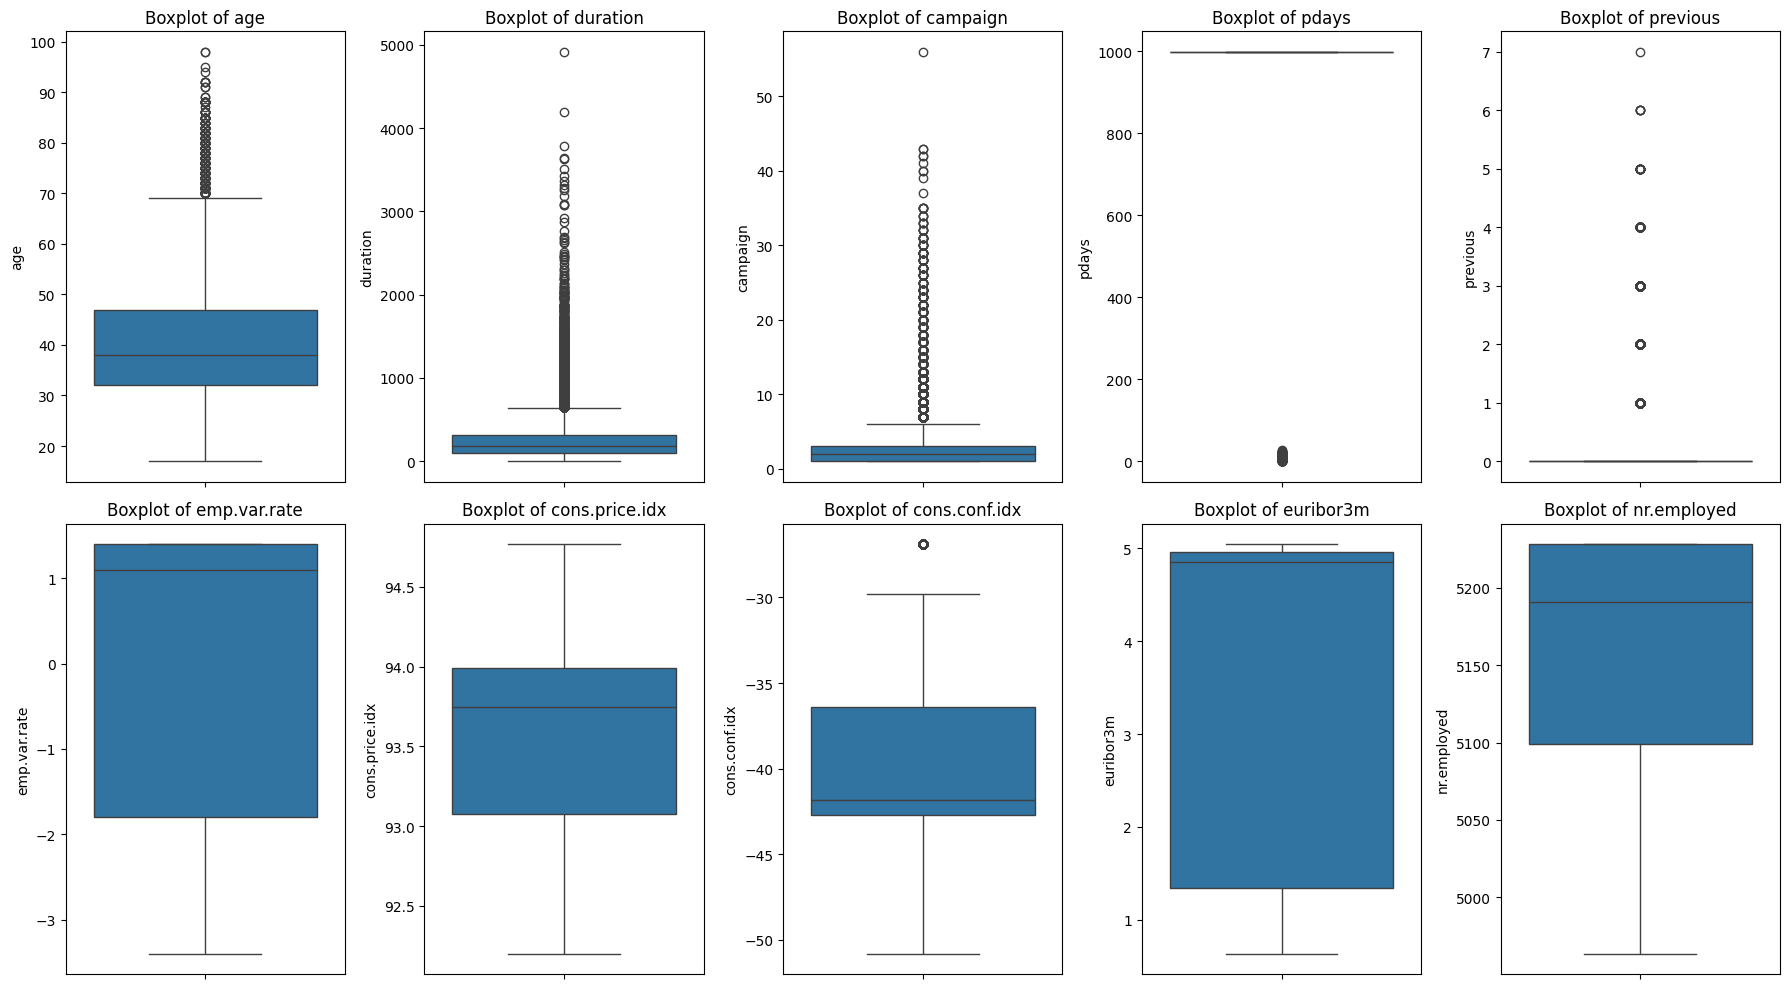

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- Age: The distribution is right-skewed, with most clients between 30 and 60 years old. There are a few outliers above 70.
- Duration: This feature has a large number of outliers, with most calls being short but a few lasting much longer. The presence of extreme values suggests that some calls were exceptionally long.
- Campaign: Most clients were contacted less than 5 times, but there are some outliers with a much higher number of contacts, indicating repeated follow-ups for a small group.
- Pdays: The boxplot shows a highly skewed distribution, with most values at the upper extreme (likely 999), indicating that most clients were not previously contacted.
- Previous: Most values are zero, but there are a few outliers where clients had multiple previous contacts.
- Emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed: The boxplot suggest that most values are concentrated within a narrow range, but there are little deviations, posssibly due to economic environment. 

In [21]:
# Check for outliers in each numerical column using the IQR method
outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'num_outliers': outliers.shape[0],
        'percent_outliers': 100 * outliers.shape[0] / df.shape[0]
    }

# Display outlier summary for each numerical column
for col, stats in outlier_summary.items():
    print(f"{col}: {stats['num_outliers']} outliers ({stats['percent_outliers']:.2f}%)")

age: 467 outliers (1.13%)
duration: 2963 outliers (7.20%)
campaign: 2406 outliers (5.84%)
pdays: 1513 outliers (3.68%)
previous: 5621 outliers (13.65%)
emp.var.rate: 0 outliers (0.00%)
cons.price.idx: 0 outliers (0.00%)
cons.conf.idx: 446 outliers (1.08%)
euribor3m: 0 outliers (0.00%)
nr.employed: 0 outliers (0.00%)


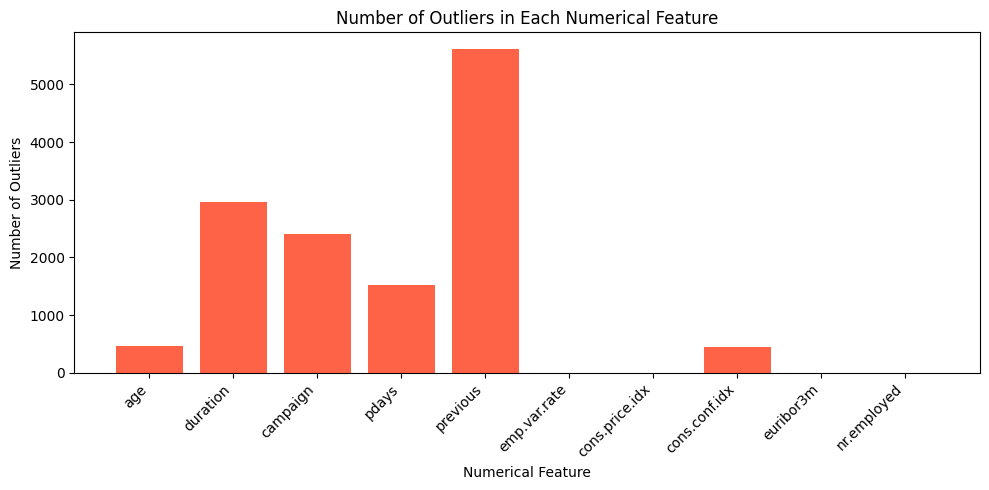

In [22]:


# Visualize the number of outliers for each numerical column
outlier_counts = [outlier_summary[col]['num_outliers'] for col in numerical_cols]

plt.figure(figsize=(10, 5))
plt.bar(numerical_cols, outlier_counts, color='tomato')
plt.title('Number of Outliers in Each Numerical Feature')
plt.xlabel('Numerical Feature')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Now Lets have look at Correlation matrix and linear relationships

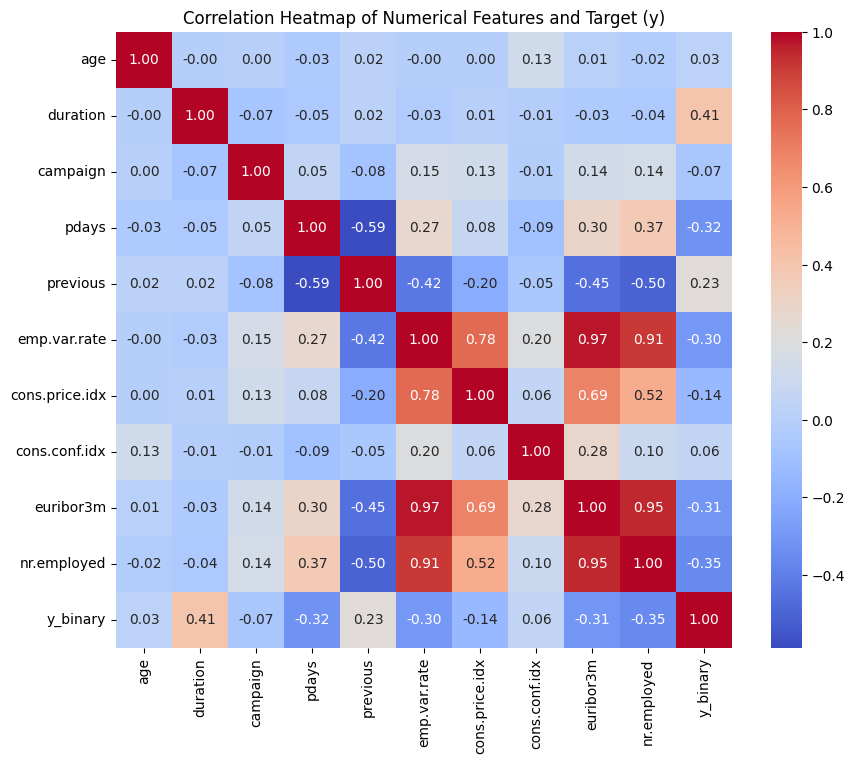

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure y_binary exists
if 'y_binary' not in df.columns and 'y' in df.columns:
    df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})

# Select numerical columns plus the binary target
corr_cols = list(numerical_cols) + ['y_binary']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features and Target (y)')
plt.show()

In [24]:
# Encode the target variable 'y' as binary: 'yes' = 1, 'no' = 0 (if not already done)
if 'y_binary' not in df.columns and 'y' in df.columns:
    df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})

# Calculate correlation of each numerical feature with the target if possible
try:
    correlations = df[numerical_cols].corrwith(df['y_binary'])
    correlations = correlations.sort_values(ascending=False)
    print('Correlation of numerical features with target (y) in descending order:')
    print(correlations)
except Exception as e:
    print('DataFrame or target not loaded yet:', e)

Correlation of numerical features with target (y) in descending order:
duration          0.405328
previous          0.229972
cons.conf.idx     0.055124
age               0.030306
campaign         -0.066343
cons.price.idx   -0.136413
emp.var.rate     -0.298251
euribor3m        -0.307641
pdays            -0.324512
nr.employed      -0.354532
dtype: float64


In [25]:
# List columns with correlation outside the range -0.2 to 0.2
strong_corr_cols = correlations[(correlations < -0.2) | (correlations > 0.2)].index.tolist()
print('Columns with correlation outside [-0.2, 0.2]:')
print(strong_corr_cols)

Columns with correlation outside [-0.2, 0.2]:
['duration', 'previous', 'emp.var.rate', 'euribor3m', 'pdays', 'nr.employed']


- Lets try to visualize the relationship

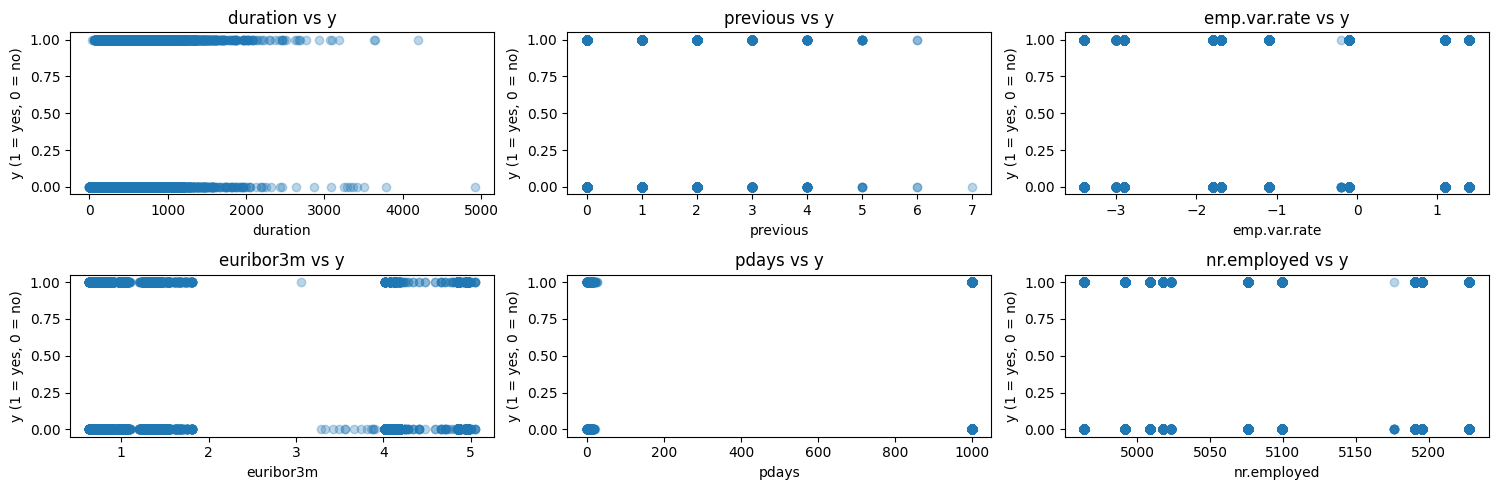

In [26]:


# Plot scatter plots for strong correlation columns in a 2x5 grid of subplots
n = len(strong_corr_cols)
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
axes = axes.flatten()

y_numeric = df['y'].map({'yes': 1, 'no': 0})

for i, col in enumerate(strong_corr_cols):
    if df[col].nunique() > 1:
        axes[i].scatter(df[col], y_numeric, alpha=0.3)
        axes[i].set_title(f'{col} vs y')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('y (1 = yes, 0 = no)')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

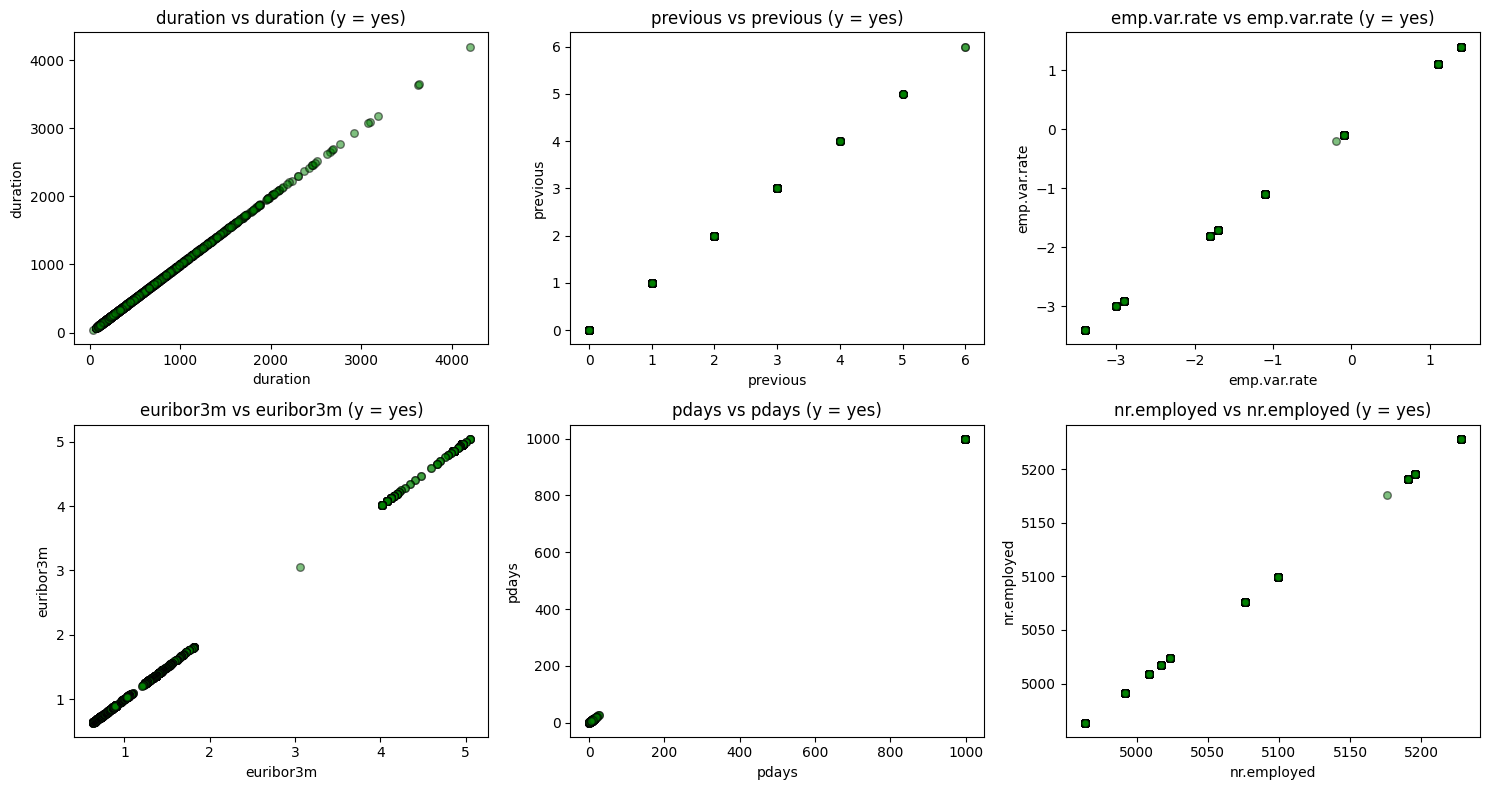

In [27]:
# Scatter plots: each feature in strong_corr_cols vs itself for only y=1 (target 'yes')
df_yes = df[df['y'] == 'yes']

n = len(strong_corr_cols)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(strong_corr_cols):
    ax = axes[i]
    ax.scatter(df_yes[col], df_yes[col], c='green', alpha=0.5, edgecolor='k', s=30)
    ax.set_xlabel(col)
    ax.set_ylabel(col)
    ax.set_title(f'{col} vs {col} (y = yes)')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- duration: There is a clear positive relationship—longer call durations are associated with a higher probability of a positive response (y = yes). Most successful outcomes occur at higher durations.
- previous: Clients with more previous contacts are slightly more likely to subscribe, but the effect is not very strong; most responses are clustered at low values.
- emp.var.rate, euribor3m, nr.employed: These economic indicators show that certain values are associated with a higher likelihood of subscription. For example, lower emp.var.rate and euribor3m values, and lower nr.employed values, are more often linked to positive responses.
- pdays: Clients who were contacted recently (lower pdays values) are more likely to subscribe, while those with pdays at 999 (not previously contacted) are less likely to respond positively.

# Summary of the Notebook

This notebook provides a comprehensive exploratory data analysis (EDA) of the Telecom Campaign dataset. The workflow and findings are as follows:

- **Data Import and Cleaning:**
  - The raw data required string manipulation to correct formatting issues before loading into a pandas DataFrame.
  - Column names and string values were cleaned to remove extraneous quotes and whitespace.

- **Initial Exploration:**
  - The dataset contains 10 numerical and 11 categorical features.
  - Descriptive statistics and info summaries were generated for both types of features.
  - No null values were found, but 12 duplicate rows were identified and removed.

- **Categorical Feature Analysis:**
  - Categorical features were described and visualized using pie and bar charts.
  - Key findings include dominance of certain categories (e.g., 'admin.' in job, 'married' in marital, 'university.degree' in education) and class imbalance in the target variable.
  - Seasonality and distribution patterns were observed in features like month and day_of_week.

- **Chi-Squared Test:**
  - A chi-squared test was performed to assess the association between categorical features and the target.
  - Contact method, default status, and education showed the strongest associations with the target variable.

- **Analysis of 'Unknown' Values:**
  - The frequency and percentage of 'unknown' values in each categorical feature were calculated and visualized.
  - The 'default' feature had the highest proportion of 'unknown' values, followed by education, housing, and loan.
  - Most other features had very few or no 'unknown' values.

- **Numerical Feature Analysis:**
  - Descriptive statistics, histograms, and boxplots were used to explore numerical features.
  - Many features (e.g., duration, campaign, pdays, previous) were right-skewed and contained outliers.
  - Economic indicators showed multimodal or discrete distributions.
  - Outlier counts were calculated and visualized for each numerical feature.

- **Correlation and Feature Relationships:**
  - Correlation matrices and heatmaps were generated for numerical features and the binary target.
  - Features with strong correlations to the target were identified and visualized using scatter plots.
  - Key relationships included longer call durations and recent contacts being associated with higher subscription rates.

- **Key Insights:**
  - The dataset is characterized by class imbalance, outliers, and some missingness in categorical features (as 'unknown').
  - Certain features (contact method, duration, economic indicators) are more predictive of the target.
  - The EDA provides a solid foundation for further modeling and feature engineering.

This summary encapsulates the main steps, visualizations, and findings from the notebook's markup cells.

# This is the end of the Notebook